<a href="https://colab.research.google.com/github/fxnnxc/class-MachineLearning/blob/master/Assignment05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment05 
Logistic Regression

## 1. Plot the training data

plot the training data points (x,y) with their labels in colors (blue for label 0 and red for label 1)

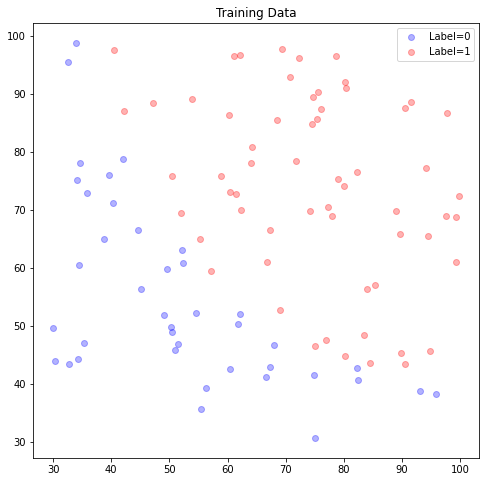

In [4]:
# Read data
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data5.txt", delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]

x_label0    = x[label == 0]
x_label1    = x[label == 1]

y_label0    = y[label == 0]
y_label1    = y[label == 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.title('Training Data')
plt.legend(['Label=0','Label=1'])
plt.show()

## 2. Plot the estimated parameters

$σ(z)$ where $z= \theta_0 + \theta_1 x + \theta_2 y$

In [0]:
# Define Functions
import math

def sigmoid(x): #시그모이드 함수
      t = math.exp(-x)
      return 1/(1+t)

def loss(t0,t1,t2, data): #세타값에 대한 데이터의 로스
  Z = [(t0+t1*d[0]+t2*d[1],int(d[2])) for d in data] 
  return sum([-z[1]*math.log(sigmoid(z[0]))-(1-z[1])*math.log(1-sigmoid(z[0])) for z in Z])/len(data)

In [0]:
# Training 

# Define Hyperparameters
lr = 0.0001

# Initial values 
theta = [0,0,0]
J  = loss(theta[0],theta[1],theta[2],data)
THETA = [theta[:]]
LOSS = [J]

while True:
  temp = J
  M = len(data)
  # Update Theta
  t0,t1,t2 = theta
  theta[0] =theta[0] - lr* sum([sigmoid(t0+t1*d[0]+t2*d[1]) - d[2] for d in data])/M
  theta[1] =theta[1] - lr* sum([(sigmoid(t0+t1*d[0]+t2*d[1]) - d[2])*d[0] for d in data])/M
  theta[2] =theta[2] - lr* sum([(sigmoid(t0+t1*d[0]+t2*d[1]) - d[2])*d[1] for d in data])/M
  THETA.append(theta[:]) # Store Theta

  # Update and Store Loss
  J = loss(theta[0], theta[1], theta[2], data)
  LOSS.append(J)
  if abs(J-LOSS[len(LOSS)-2])  <0.00000005: # Convergence
    break

Text(0.5, 1.0, 'Estimated parameters using the training dataest until 1000 iterations')

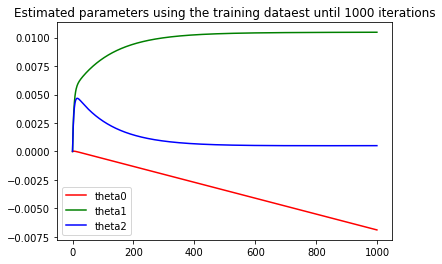

In [26]:
import matplotlib.pyplot as plt

colors = ['red', 'green', 'blue'] 
for i in range(3): # 색깔별로 출력 
  plt.plot([THETA[j][i] for j in range(1000)], c=colors[i]) 
plt.legend(['theta0', 'theta1', 'theta2'])
plt.title('Estimated parameters using the training dataest until 1000 iterations')

## 3. Plot the training error

Text(0.5, 1.0, 'Error Using Training Data')

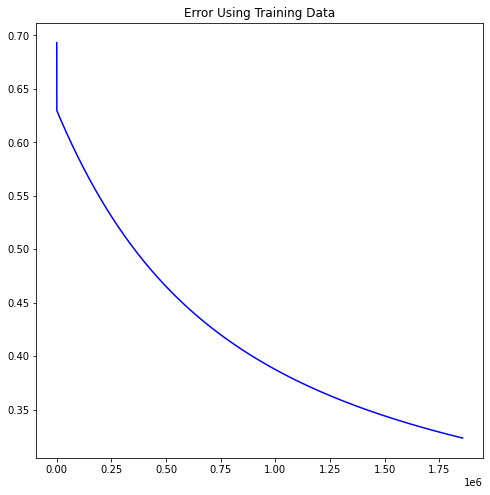

In [14]:
# LOSS 변수에 저장된 에러를 플롯

plt.figure(figsize=(8,8))
plt.plot(LOSS, color='blue')
plt.title('Error Using Training Data')

## 4. Plot the obtained classifier

In [0]:
X= np.arange(30, 100,0.5)
Y= np.arange(30, 100,0.5)
L0_X = []
L0_Y = []
L1_X = []
L1_Y = []
for x in X:
  for y in Y:
    # Sigmoid 값을 기준으로 분할
    if sigmoid(theta[0]+x*theta[1] +y*theta[2])<=1/2:  # 값이 1/2 이하 Label 0
      L0_X.append(x)
      L0_Y.append(y)
    else:                                              # 값이 1/2 초과 Label 1
      L1_X.append(x)
      L1_Y.append(y)

theta: [-7.137243547360301, 0.06307712153450938, 0.05651486461143085]


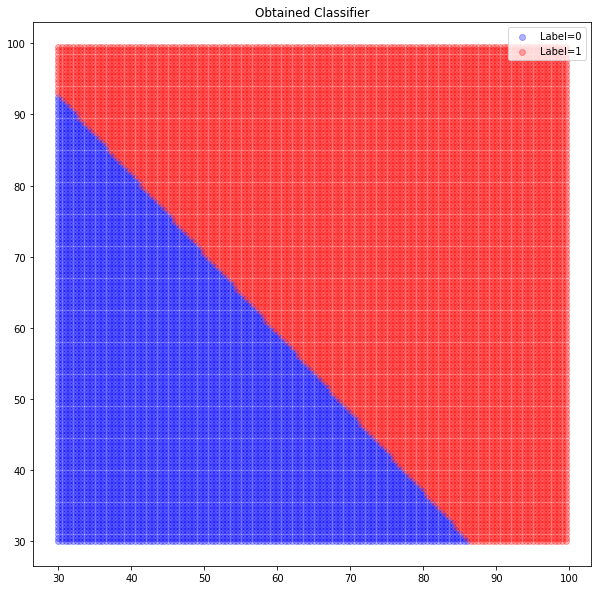

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(L0_X, L0_Y, c='blue', alpha=0.3, lw=1)
plt.scatter(L1_X, L1_Y, c='red', alpha=0.3, lw=1)
plt.title('Obtained Classifier')
plt.legend(['Label=0','Label=1'])
print('theta:', theta)

## 5. Conclusion

$σ(z)$ 의 값을 $1/2$ 기준으로 학습했을 때, $\theta_1,\theta_2$의 값은 0 주변에 있었고
$\theta_0$는 지속적으로 변하였다. 

$z = \theta_0 + \theta_1 x + \theta_2 y \approx -7 + 0.063x + 0.0.056y $ 임을 알 수 있다.  